# Variante 3 de LenNet5

## Réalisé par : Ahmed Mrabet

Dans ce notebook, nous allons effectuer une implémentation de la variante 3 de l'architecture LeNet5. Cette variante contient les modifications suivantes par rapport à l'architecture de la variante 2 :
-	Ajouter des couches de normalisation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Nouveau modèle CNN

### Step 1: Dataset

In [2]:
img_height = 32
img_width = 32
batch_size = 64

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.


#### Visualisation des données

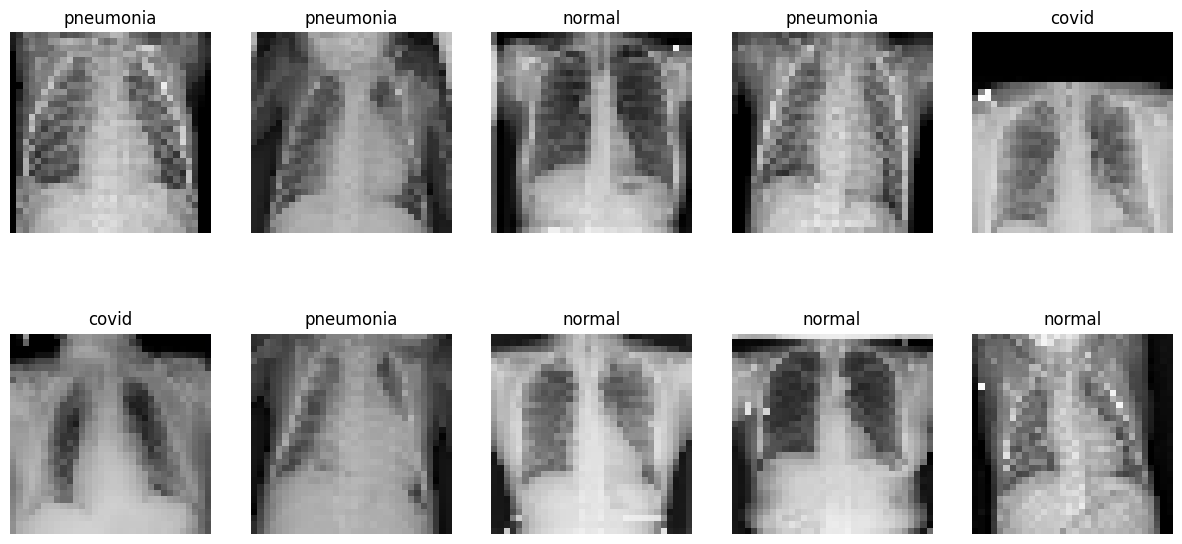

In [3]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [4]:
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    return image, label

train_dataset = train_dataset.map(convert_to_grayscale)
validation_dataset = validation_dataset.map(convert_to_grayscale)
test_dataset = test_dataset.map(convert_to_grayscale)

### Step 2: Création du modèle

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)

In [6]:
model = Sequential([    
    Rescaling(1./255),
    
    Conv2D(32, kernel_size=(3, 3), activation='leaky_relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(64, kernel_size=(3, 3), activation='leaky_relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(84, activation='leaky_relu'),
    Dense(3, activation='softmax')  # 3 classes: Normal, Pneumonia, COVID
])

### Step 3: Paramétrage du modèle

In [7]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.001), 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

### Step 4: Training du modèle

In [8]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.7552 - loss: 0.7185 - val_accuracy: 0.3357 - val_loss: 1.0867
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.9184 - loss: 0.2583 - val_accuracy: 0.3343 - val_loss: 1.0754
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - accuracy: 0.9302 - loss: 0.2205 - val_accuracy: 0.3841 - val_loss: 0.9610
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 260ms/step - accuracy: 0.9432 - loss: 0.1751 - val_accuracy: 0.4823 - val_loss: 0.9384
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step - accuracy: 0.9629 - loss: 0.1127 - val_accuracy: 0.5061 - val_loss: 0.9683
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9635 - loss: 0.1014 - val_accuracy: 0.8101 - val_loss: 0.5053
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.9708 - loss: 0.0776 - val_accuracy: 0.7913 - val_loss: 0.5601
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.9851 - loss: 0.0486 - val_accuracy: 0.781

### Step 5: Test

In [9]:
model.evaluate(test_dataset, verbose=2)

22/22 - 4s - 180ms/step - accuracy: 0.8800 - loss: 0.3995


[0.3995210528373718, 0.8799999952316284]